<a href="https://colab.research.google.com/github/Gaurav2912/Telecom-Churn-Analysis---Capstone-Project/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Goal :Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

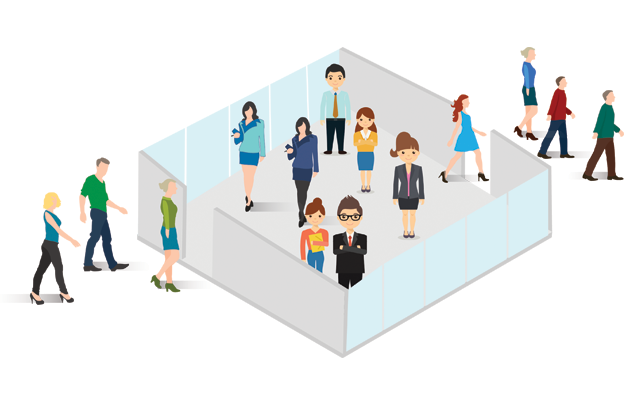

#What is customer churn?

Customer churn is the term used when an existing customer stops using a company’s services and/or stops buying their products. In other words, the customer chooses to cut his ties with the company. 

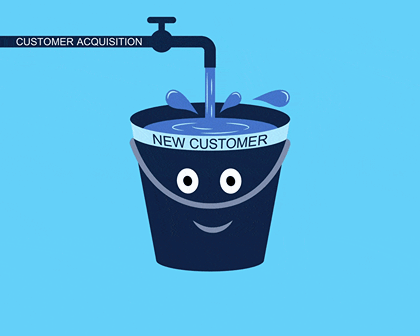

# All features

* **State:** 51 Unique States in United States of America

* **Account Length:**  Length of The Account

* **Area Code :** 3 unique codes, 408 is of San Jose, 415 is of San Francisco and 510 is of City of Okland

* **International Plan:** Yes Indicate International Plan is Present and No Indicates no subscription for Internatinal Plan

* **Voice Mail Plan:** Yes Indicates Voice Mail Plan is Present and No Indicates no subscription for Voice Mail Plan

* **Number vmail messages:** Number of Voice Mail Messages ranging from 0 to 51.

* **Total day minutes:** Total Number of Minutes Spent By Customers in Morning

* **Total day calls:** Total Number of Calls made by Customer in Morning.

* **Total day charge:** Total Charge to the Customers in Morning.

* **Total eve minutesTotal:** Number of Minutes Spent By Customers in Evening

* **Total eve calls:** Total Number of Calls made by Customer in Evening.

* **Total eve charge:** Total Charge to the Customers in Evening.

* **Total night minutes:** Total Number of Minutes Spent By Customers in the Night.

* **Total night calls:** Total Number of Calls made by Customer in Night.

* **Total night charge:** Total Charge to the Customers in Night.

* **Total intl minutes:** Total Number of Minutes Spent By Customers in international calls.

* **Total intl calls:**  Total Number of International calls made by Customer.

* **Total intl charge:** Total charge to Customers in international calls.

* **Customer service calls:** Total number of Calls by Customer to service Center, ranging from 0 to 9.

* **Churn:** Whether he customer churned or not(True or False).

In [1]:
# Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Installing some important libraries**

In [142]:
sns.__version__

'0.11.2'

In [2]:
!pip install plotly
!pip install cufflinks
!pip install chart-studio
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 2.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.2 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=f501739d7875d9dc0c21c7b786429ca6cf74dfb527b554fe84c6cd4510d0da5a
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Imports for Reading, Exploring and Visulization of the Data**

In [59]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import chart_studio.plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display

# for removing Future Warnings in seaborn plots
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)
%matplotlib inline

In [4]:
# For Colab
import plotly.io as pio
pio.renderers.default = "colab"

In [5]:
# Read the csv file from google drive
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA project/EDA/Telecom Churn.csv')

In [6]:
# Head of the data frame
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
# tail of the data frame
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


**Confirm quickly with .info() methods the datatypes in our dataframe.**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [9]:
# checking for null values 
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

From above we can see that, there is not a single missing value anywhere in Data Frame. 

In [10]:
# Checking for Unique values 
df.nunique().sort_values()

Churn                        2
International plan           2
Voice mail plan              2
Area code                    3
Customer service calls      10
Total intl calls            21
Number vmail messages       46
State                       51
Total day calls            119
Total night calls          120
Total eve calls            123
Total intl minutes         162
Total intl charge          162
Account length             212
Total night charge         933
Total eve charge          1440
Total night minutes       1591
Total eve minutes         1611
Total day charge          1667
Total day minutes         1667
dtype: int64

**Churn,International plan, Voice mail plan** are binary categorical variable, their values are either Yes or No.

**Area code:** 3 unique area code.

**State:** 51 states of USA.

Get a quick ***statistical*** summary of the numeric columns with .describe(), we  notice that many columns are categorical.

statistical summary means mean, median, std, min, max and Quartiles..


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


From above,

*   Customer service calls are quite rare, we can see that most people rarely call for service.  
*   Half of the people dont use voice messages.
* International call service is also very less, but their charges are quit heigh compare to domestic calls.
* Lots of features have aproximatlly same mean and median means they are  symmetrically distributed and have zero skewness.



# Data Cleaning, Preprocessing and Feature engineering.
It is process of using domain knowledge to extract features from raw data via data mining technique.

There are Three genral approches:
* Extracting Information
* Combining Information
* Transforming Information

Here, I am going to create few new features such as,

* Total minutes, Total calls and Total charge by summing up day, eve and night data.

* Charge per minutes for every category  

In [12]:
# calculate Charge per minutes and Charge per calls for every category
df['Charge/min day'] =  df['Total day charge'] / df['Total day minutes']
df['Charge/min eve'] =  df['Total eve charge'] / df['Total eve minutes'] 
df['Charge/min night'] =  df['Total night charge'] / df['Total night minutes'] 
df['Charge/min intl'] =  df['Total intl charge'] / df['Total intl minutes']


**Correcting data types**
* We know that area code is hierarchical variable and data has 3 distinct unique values without any hierarchy, better convert it to object data type.

In [13]:
# convert the data type of the Area code, scince are code is kind of lable, there is no hireacry in it.
df['Area code'] = df['Area code'].astype('str')

In [14]:
# New features
created_lst = ['Charge/min day', 'Charge/min eve', 'Charge/min night', 'Charge/min intl']

Get a quick statistical summary of the new numeric columns

In [15]:
df[created_lst].describe().T

,count,mean,std,min,25%,50%,75%,max
Charge/min day,3331.0,0.170003,0.000028,0.169231,0.169989,0.170004,0.170017,0.170513
Charge/min eve,3332.0,0.085001,0.000016,0.084936,0.084988,0.085000,0.085013,0.085075
Charge/min night,3333.0,0.045000,0.000017,0.044828,0.044988,0.045000,0.045013,0.045111
Charge/min intl,3315.0,0.270057,0.000329,0.268182,0.269811,0.270000,0.270297,0.272727


mean med same , low std

# Exploratory data analysis

lets do some exploration andvisulization for diffrent- diffrent data.

In [103]:
# set default gridtype, fontsize and palette
sns.set_style("whitegrid")
sns.set_palette(palette = ['#4169E1', '#FF5F15', '#4CBB17'])
plt.rcParams['font.size'] = 14

# Observation 1

**Display the balance of the class labels (Churn) with a Count Plot.**

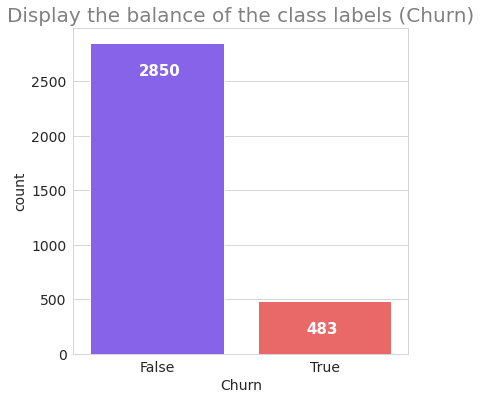

In [17]:
plt.figure(figsize= (6,6))

churn_users = sum(df['Churn'] == True)   # No. of churn users
retain_users = sum(df['Churn'] == False)  # No. of retained users
unique_label = df['Churn'].nunique()       # No. of unique label class, (2 classes)
total_users = len(df)                    # Total number of users

user_class_count = [retain_users, churn_users]  # data that we want to write on countplot 


for i in range(unique_label):
    plt.text(x= i- 0.11,y= user_class_count[i]-300,
            s= user_class_count[i], fontsize=15, weight='bold',
                color='white')

sns.countplot(data=df,x='Churn', palette = ['#7C4DFF', '#FF5252'])
plt.title('Display the balance of the class labels (Churn)', size=20, color='grey');

* The target variable is highly imbalanced.

In [18]:
# calculate pecentage of customer that churned and not churned
churn_percent = round(100 * churn_users / total_users, 2)
retain_percent = round(100 * retain_users / total_users, 2)
retain_to_churn_ratio = round(retain_percent/ churn_percent, 2)
print(retain_to_churn_ratio)

5.9


[Documantation for Pie chart](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html)

**Pie chart, where the slices will be ordered and plotted counter-clockwise:**

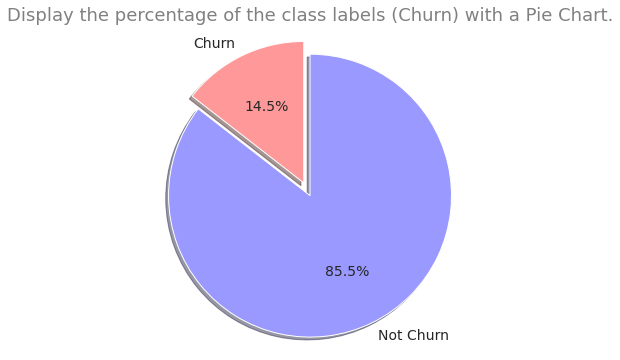

In [181]:
labels = ['Churn', 'Not Churn']

# plt.rcParams['font.size'] = 
sizes = [churn_percent, retain_percent]
explode = (0.1, 0)  
colors = ['#ff9999','#9999ff']


plt.figure(figsize= (8,6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',colors= colors,
        shadow=True, startangle=90,  textprops={'fontsize': 14})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Display the percentage of the class labels (Churn) with a Pie Chart.", fontsize= 18, color='grey');

* This pie chart shows that 14.5% of Orange Telecom's customers have churned.
* For every single churn customers  we have 5.9 retain customers.

#  Observation 2
**Lets explore the charge per minutes and our customer's talking behaviour for different-different time-zone.**

In [ ]:
plt.figure(figsize= (8,5), dpi= 100)
plt.title("Display the Mean of Charge per minutes for different-different time-zone", fontsize= 15)
all_per_minutes = ['Charge/min intl','Charge/min day', 'Charge/min eve', 'Charge/min night']

lineplot_zone_wise = [0.2, 0.1, 0.04, 0.01]  # this is only for plot 

for i, item in enumerate(all_per_minutes):
  mu_item= round(df[item].mean(), 2)
  plt.text(x= i- 0.15,y= mu_item - 0.03,
            s= mu_item, fontsize=15, weight='bold',
                color= 'white')
# Bar Plot 
sns.set_style("whitegrid")
sns.barplot(data=df[all_per_minutes], palette= ['#7C4DFF','#FF4081','#00E5FF', '#0FFF50'])

sns.lineplot(marker='o', x= all_per_minutes, y= lineplot_zone_wise , color = 'white', alpha = .8)
plt.xticks(rotation=25);

Charges for International calls are highest, followed by day, then evening and night calls are cheapest.
* This is obvious that international calls are expensive compare to domestic calls.
* Night calls are cheaper, may be due to night tariff plans.

Median and Mean of Total day minutes : 179.40 and 179.78
Median and Mean of Total eve minutes : 201.40 and 200.98
Median and Mean of Total night minutes : 201.20 and 200.87


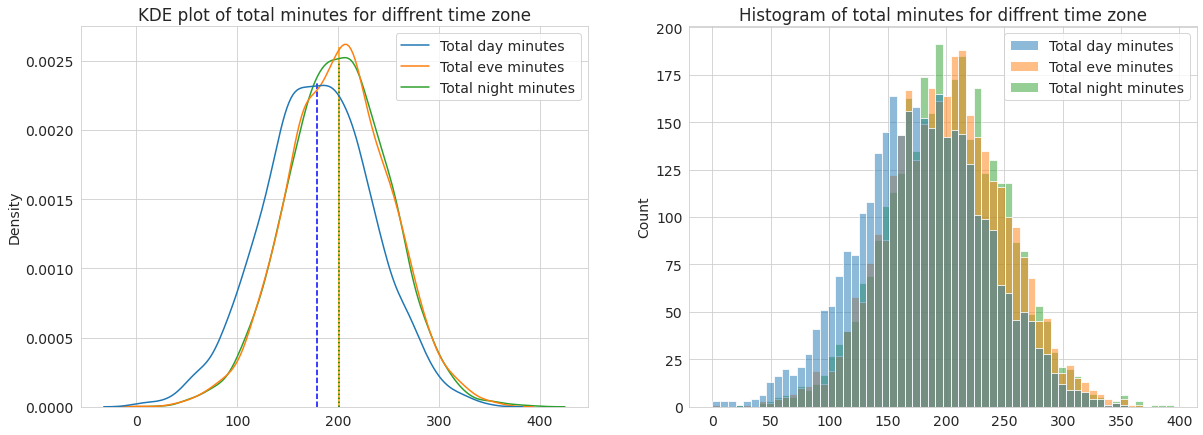

In [21]:
# creating subplots
fig, ax = plt.subplots(nrows= 1, ncols= 2, figsize= (20,7))

# KDE plot
sns.kdeplot(data= df[['Total day minutes', 'Total eve minutes', 'Total night minutes']], ax= ax[0], palette= 'tab10')
ax[0].set_title('KDE plot of total minutes for diffrent time zone')

# Histogram
sns.histplot(data= df[['Total day minutes', 'Total eve minutes', 'Total night minutes']], ax= ax[1], palette= 'tab10')
ax[1].set_title('Histogram of total minutes for diffrent time zone')

# calculating median 
med_day_min = df['Total day minutes'].median()
med_eve_min = df['Total eve minutes'].median()
med_nig_min = df['Total night minutes'].median()

# Virtical line plot at median of kde plot
ax[0].vlines(x = med_day_min, ymin = 0, ymax = 0.00234,colors = 'blue',ls= '--')
ax[0].vlines(x = med_eve_min, ymin = 0, ymax = 0.0026,colors = 'orange',ls= '-')
ax[0].vlines(x = med_nig_min, ymin = 0, ymax = 0.0025,colors = 'green',ls= ':')

# Print the median and mean of totel minutes
print(f"Median and Mean of Total day minutes : {med_day_min:.2f} and {df['Total day minutes'].mean():.2f}")
print(f"Median and Mean of Total eve minutes : {med_eve_min:.2f} and {df['Total eve minutes'].mean():.2f}")
print(f"Median and Mean of Total night minutes : {med_nig_min:.2f} and {df['Total night minutes'].mean():.2f}");

 * On average, our customers prefer to talk more at night and evening than during the day.

# Observation 3
**Droping few features, sence their part is done**

In [22]:
all_per_minutes # although we have already created this list

['Charge/min intl', 'Charge/min day', 'Charge/min eve', 'Charge/min night']

In [23]:
df.drop(all_per_minutes, axis= 1, inplace= True)

In [24]:
# Lest check our columns, after dropping
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

**A quick look of Histogram of each numerical attribute**

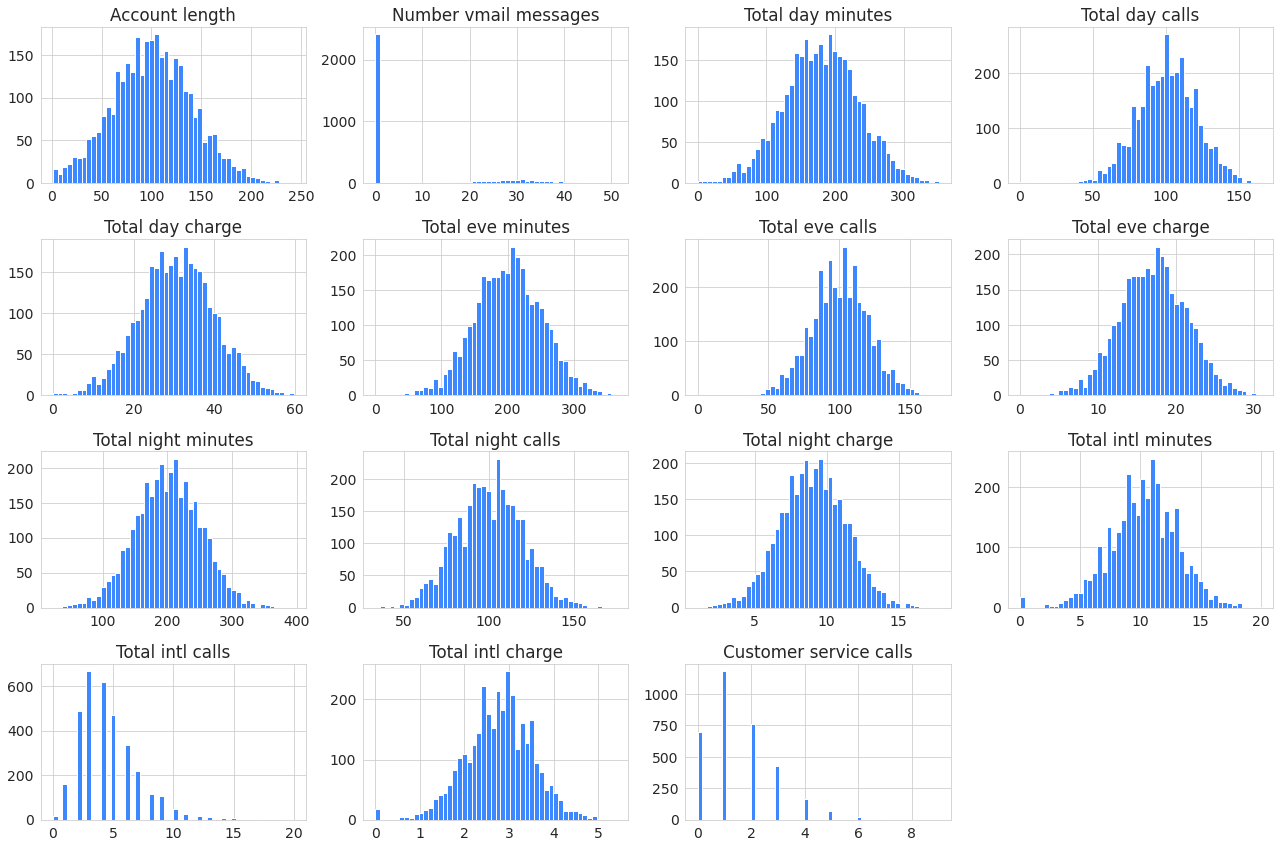

In [25]:
df.hist(bins= 50, figsize= (18,12), color=  '#3d87ff')
plt.title("Histogram for each numerical attribute.", fontsize= 18)
plt.tight_layout()
plt.show();

* Most of the feature approximately follows **Normal** Distribution, means most of the values centered around mean of the distribution. As we move away from centre their value count gradually decrease.
* Most people don't send any voicemails, and those who have sent have between 20 and 40 messages.
* The graph of total international calls and Customer service calls are positively skewed.

# Correlation check
**Observation 4**

Before doing Correlation check, we need to do one hot encoding for categorical variables.

In [26]:
# all columns in data frame
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [27]:
df_nums = df.select_dtypes(exclude= 'object')  # data frame with numerical features
df_objs = df.select_dtypes(include= 'object')  # data frame with categorical feature

In [28]:
df_nums.columns

Index(['Account length', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [29]:
df_objs.columns

Index(['State', 'Area code', 'International plan', 'Voice mail plan'], dtype='object')

while doing one-hot encoding we remove State feature, because it will craete too many columns (50 new columns) and bunch of zeros in that columns . 

In [30]:
df_objs = pd.get_dummies(df_objs.drop('State', axis= 1), drop_first= True) # to create dummy variables
df_final = pd.concat([df['State'],df_nums, df_objs], axis= 1)

In [31]:
df_final.shape

(3333, 21)

In [32]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Number vmail messages   3333 non-null   int64  
 3   Total day minutes       3333 non-null   float64
 4   Total day calls         3333 non-null   int64  
 5   Total day charge        3333 non-null   float64
 6   Total eve minutes       3333 non-null   float64
 7   Total eve calls         3333 non-null   int64  
 8   Total eve charge        3333 non-null   float64
 9   Total night minutes     3333 non-null   float64
 10  Total night calls       3333 non-null   int64  
 11  Total night charge      3333 non-null   float64
 12  Total intl minutes      3333 non-null   float64
 13  Total intl calls        3333 non-null   int64  
 14  Total intl charge       3333 non-null   

In [33]:
corr_df = df_final.corr()

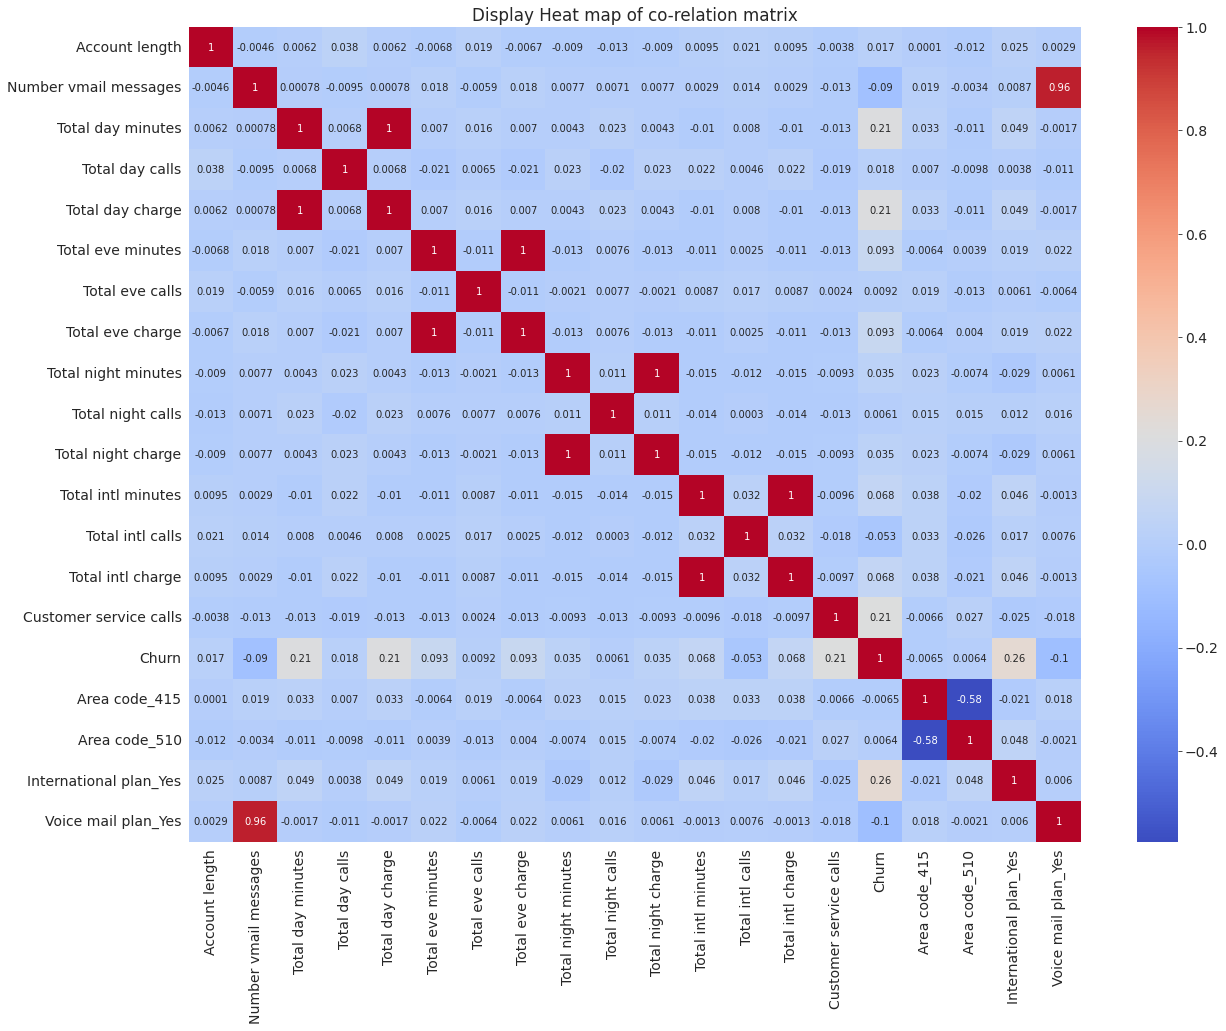

In [185]:
plt.figure(figsize= (20,15))
sns.heatmap(corr_df, annot= True, cmap= 'coolwarm', annot_kws={"size":10})
plt.title("Display Heat Map of co-relation matrix");

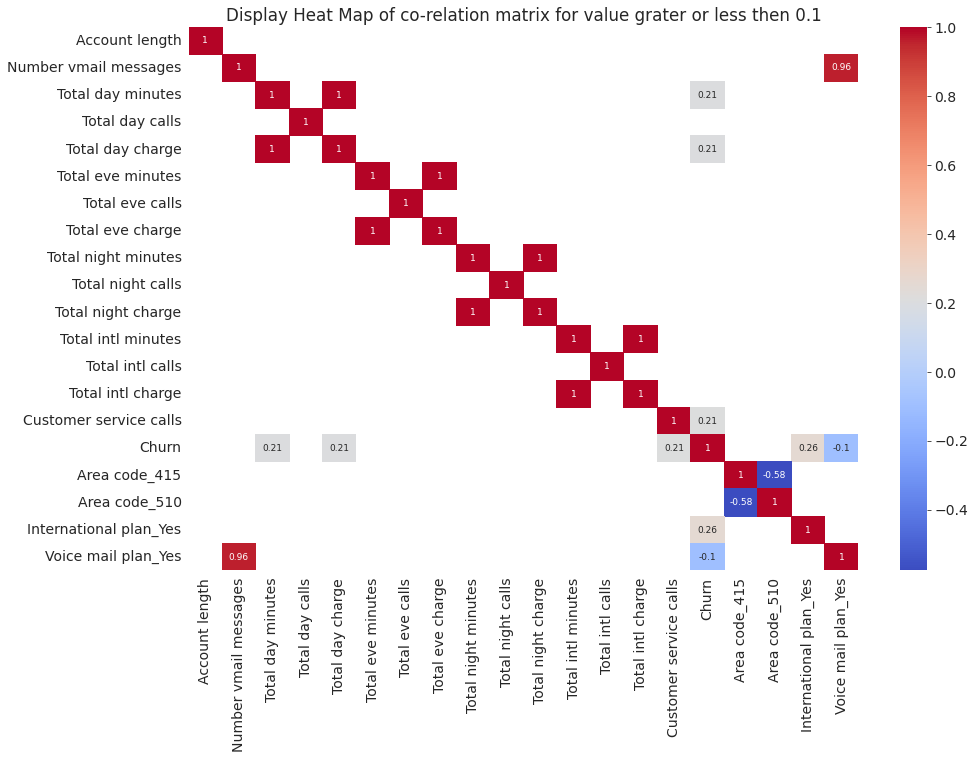

In [186]:
plt.figure(figsize= (15,10))
sns.heatmap(corr_df[(corr_df > 0.1) | (corr_df < -0.1)], annot= True,  cmap= 'coolwarm',annot_kws={"size":9})
plt.title("Display Heat Map of co-relation matrix for value grater or less then 0.1");

* We will do seprate co-relation analysis for all feature with Churn label.
* Number of Voice mail is highly co-related with voice mail plan.
* Total day minutes is perfectly co-related with total day charge, and it follows same pattern in evening, nights minutes and international minutes with charges.

# Co-relation with labels Churn 
Let's see corelation of all features with target variable (Churn).

In [36]:
corr_to_label  = corr_df['Churn'].sort_values(ascending= False).iloc[1:]  # first value is 1 (self corelation), so we ignoring it. 
corr_to_label  

International plan_Yes    0.259852
Customer service calls    0.208750
Total day minutes         0.205151
Total day charge          0.205151
Total eve minutes         0.092796
Total eve charge          0.092786
Total intl charge         0.068259
Total intl minutes        0.068239
Total night charge        0.035496
Total night minutes       0.035493
Total day calls           0.018459
Account length            0.016541
Total eve calls           0.009233
Area code_510             0.006423
Total night calls         0.006141
Area code_415            -0.006535
Total intl calls         -0.052844
Number vmail messages    -0.089728
Voice mail plan_Yes      -0.102148
Name: Churn, dtype: float64

**Creating bar plot of all features with target variable**

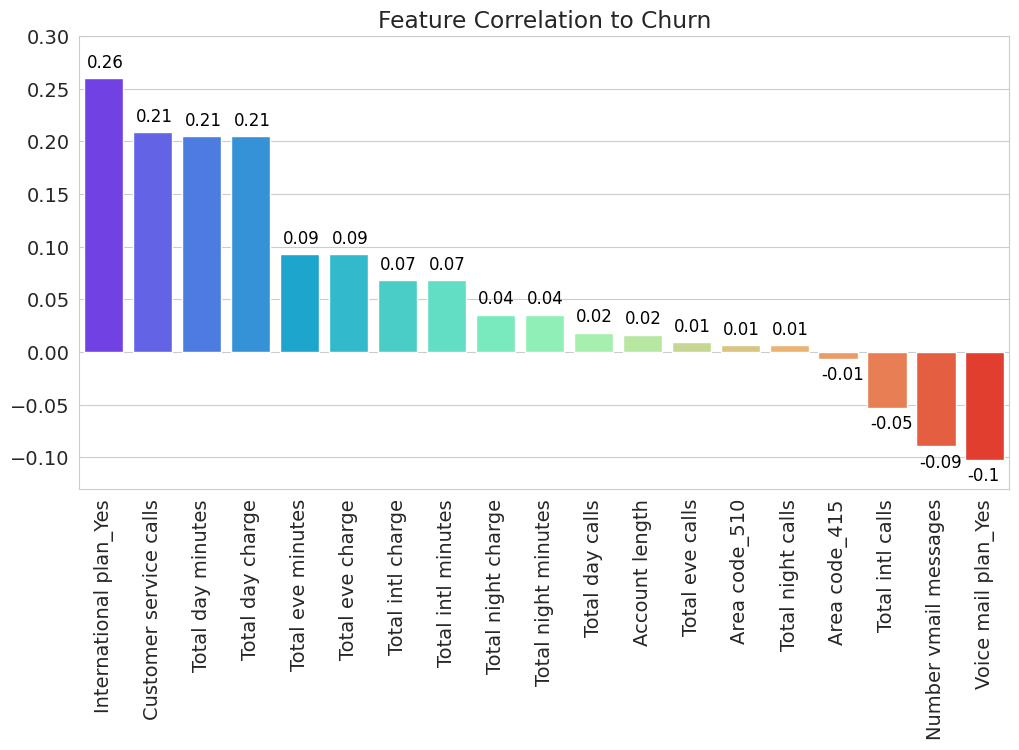

In [38]:
plt.figure(figsize=(12,6), dpi= 100)

sns.barplot(x=corr_to_label.index,y= corr_to_label.values, palette= 'rainbow')
plt.title("Feature Correlation to Churn")

# writing text on plot
for i in range(len(corr_to_label)):
  if corr_to_label.iloc[i] > 0:
    plt.text(x= i- 0.35,y= corr_to_label.iloc[i] + 0.01,
           s= round(corr_to_label.iloc[i], 2), fontsize=12,
                color= 'black')
  else:
     plt.text(x= i- 0.35,y= corr_to_label.iloc[i]-0.02,
           s= round(corr_to_label.iloc[i], 2), fontsize=12,
                color= 'black')
plt.ylim(-0.13,0.3)  
plt.xticks(rotation=90);

**Churn Lable** have 
* Positive corelation with 
  * **International plan_yes**, means for those users who have taken the international plan, there is a high chance of getting churned.
  * **Customer service calls**,If the customer makes more service calls, the chances of churn are also higher.
  * **Total day minutes** is also positivly co-related, we will further explore it.

* Negative corelation with
  * **Voice mail plan_Yes**, means for those users who have taken the Voice mail plan, then chance of getting churn will reduce.
  * We have already seen that, if person has a voicemail plan, only then s(he)
  sends voicemail.

* Almost no relation with 
  * **Account length**, **Area code** and **totel calls** at any time.

# Let's explore Churn label with all features separately


**A quick view of churn behaviour with all numeric features**

In [39]:
# creating list of all numerical features , and removig the target variable
lst_num_feature= list(df_nums)
lst_num_feature.remove('Churn')
len(lst_num_feature) # This will decide the nrows and ncol 

15

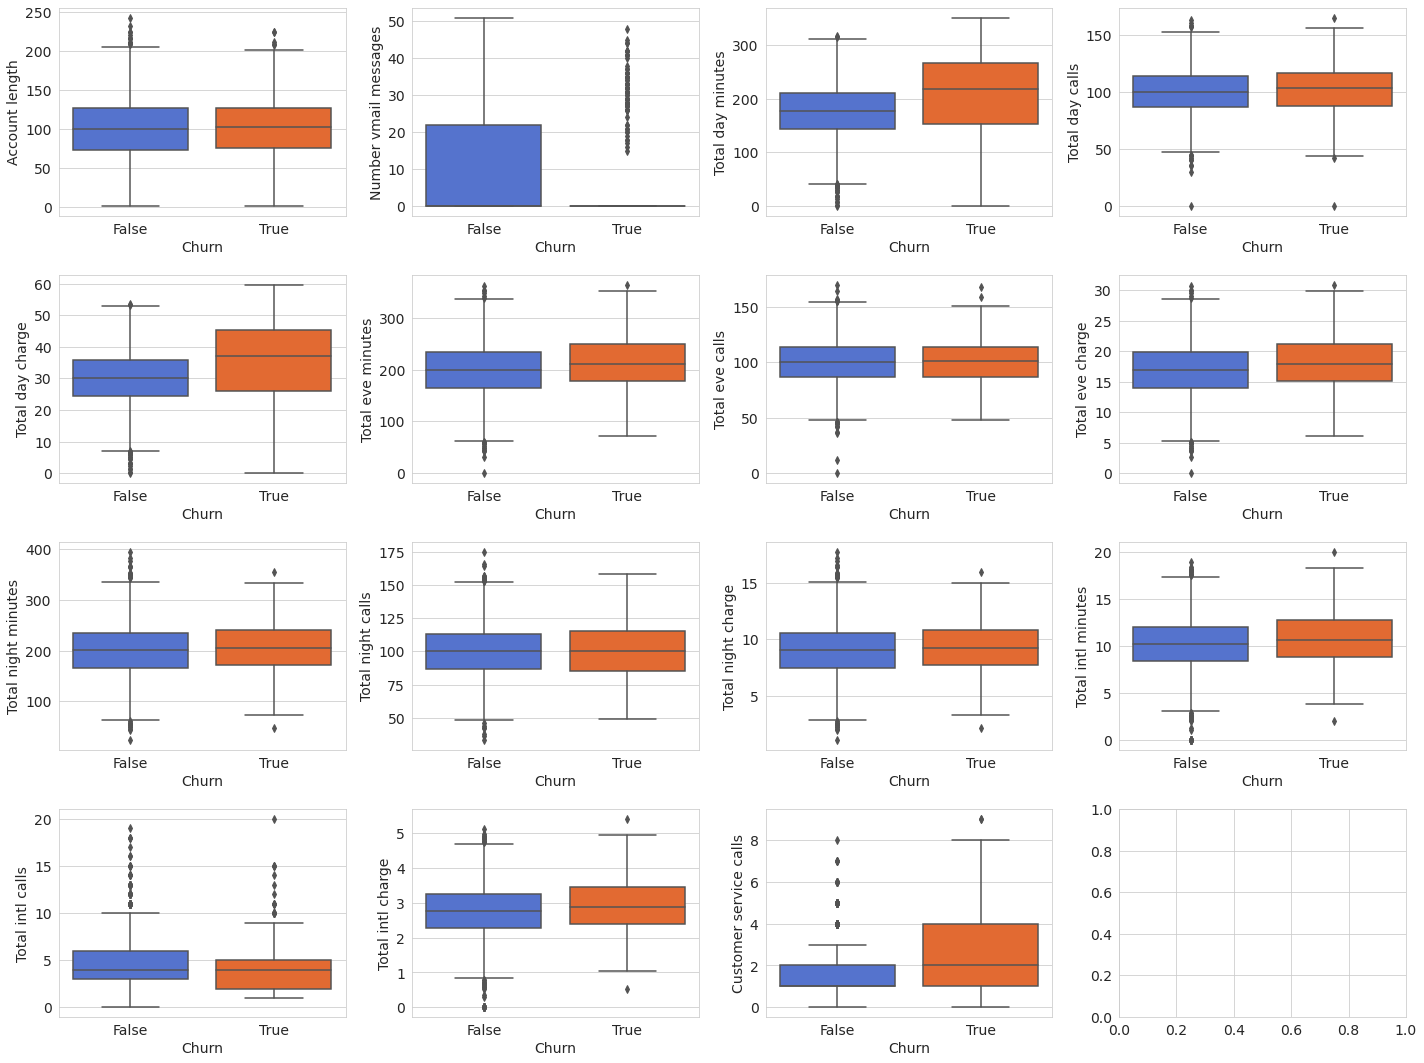

In [40]:
fig, axes = plt.subplots(nrows= 4, ncols= 4, figsize= (20,15))

for ind,num_feature in enumerate(lst_num_feature):
  sns.boxplot(ax= axes[ind // 4, ind % 4],data=df, y= num_feature, x= 'Churn')

plt.tight_layout()
plt.title("A quick display of churn behaviour with all numeric features");

For some feature churn and retain behaviour is following same pattern, but for some features it follows different behavior, let's explore them separately.


**With categorical variablese**

In [41]:
df_objs = df.select_dtypes(include= 'object')  

In [42]:
df_objs.columns

Index(['State', 'Area code', 'International plan', 'Voice mail plan'], dtype='object')

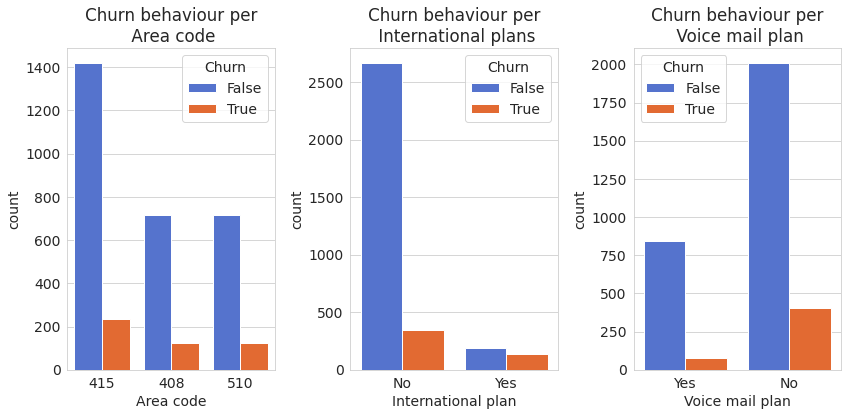

In [190]:
# For the state we will do separately 
list_of_cat = ['Area code', 'International plan', 'Voice mail plan']




# Create figure object
fig, ax = plt.subplots(nrows= 1, ncols= 3, figsize= (12,6))

for i,cat_feture in enumerate(list_of_cat):
  sns.countplot(ax= ax[i],data=df, x= cat_feture, hue= 'Churn')

ax[0].set_title("Churn behaviour per\n Area code")
ax[1].set_title("Churn behaviour per\n International plans")
ax[2].set_title("Churn behaviour per\n Voice mail plan")

plt.tight_layout();

In [188]:
# International plan
percnt_of_user_intl_plan = 100 * (df['International plan'] == "Yes").mean()

# Voice mail plan
percnt_of_user_voice_plan = 100 * (df['Voice mail plan'] == "Yes").mean()

print(f"{percnt_of_user_intl_plan:.2f}% of users have international plans.")
print(f"{percnt_of_user_voice_plan:.2f}% of users have Voice mail plans.");

9.69% of users have international plans.
27.66% of users have Voice mail plans.


* And it make sence because only few people do international calls.

**Lets calulate churn rate by each of these categories.**

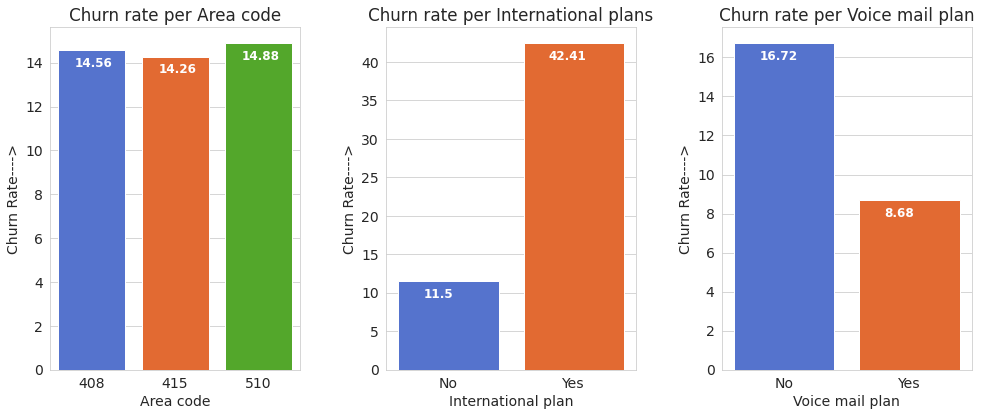

In [44]:
# Create figure object
fig, ax = plt.subplots(nrows= 1, ncols= 3, figsize= (14,6)) 

for i,item in enumerate(list_of_cat):
  # Groupby on that category then take mean on churn
  churn_rate_item = (100 * df.groupby(item)['Churn'].mean())
  sns.barplot(churn_rate_item.index,churn_rate_item.values, ax= ax[i])
  ax[i].set_ylabel('Churn Rate---->')
  for j in range(len(churn_rate_item.index)):
    ax[i].text(x= j- 0.2,y= churn_rate_item.iloc[j] - max(churn_rate_item.values) / 20  ,
            s= round(churn_rate_item.iloc[j], 2), fontsize=12, weight='bold',
                color='white')
    

ax[0].set_title("Churn rate per Area code")
ax[1].set_title("Churn rate per International plans")
ax[2].set_title("Churn rate per Voice mail plan")
plt.tight_layout();

**Churn rate is** 
* Independent of **Area Code**, and area code '415' has twice as many customers as others.
* High for those customers who have taken I**nternational plan**, and majority of users dont have **International plan**.
* Low for those customers who have taken **Voice mail plan**.   

# Churn analysis with International plans and International minutes

**Boxplot of Totel international minutes per International plans hued by Churn**

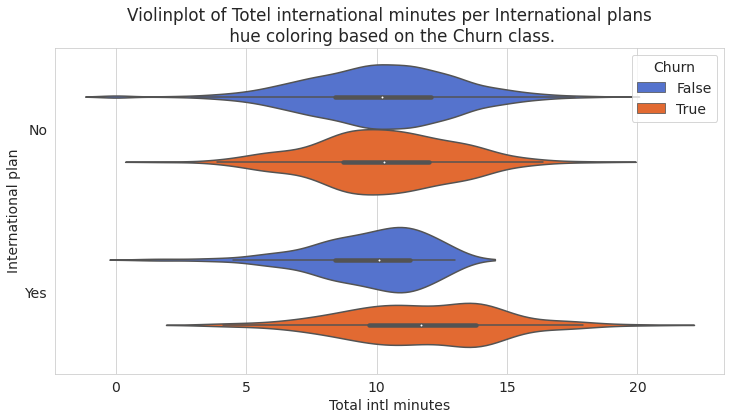

In [208]:
# Create blank figure object
plt.figure(figsize= (12,6))

sns.violinplot(data= df, x= 'Total intl minutes', y= 'International plan', hue= 'Churn', orient= 'h')

plt.title("Violinplot of Totel international minutes per International plans\n hue coloring based on the Churn class.");

* Coustomers having International plans have high overall high churn rate, and overall churn rate is increasing with total international minutes. 

# Churn analysis with International plans and International calls

**Countplot of Total international calls per International plan hued by Churn**

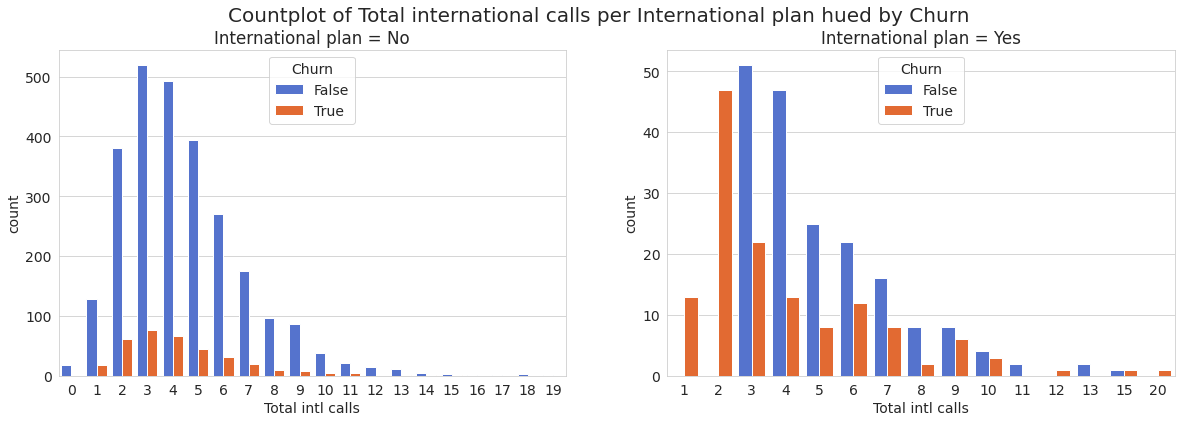

In [195]:
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize= (20,6))
sns.countplot(ax= axes[0], data=df[(df['International plan']== 'No')],hue='Churn',x='Total intl calls')
axes[0].set_title("International plan = No")
sns.countplot(ax= axes[1],data=df[(df['International plan']== 'Yes')],hue='Churn',x='Total intl calls')
axes[1].set_title("International plan = Yes")

fig.suptitle('Countplot of Total international calls per International plan hued by Churn', fontsize=20);

**Users without international**
* Churn and retain behaviour  plans follow  same pattern.

**Users with International Plans**
*  Regardless of any number total international calls Churn rate is very high.
___
# **Conclusion:**

**Customers are not satisfied with international plans**
* The Churn rate of customers who have taken international plans is much higher than average.
* Customers who did not take international plan also make international calls but their churn rate is normal.

# Churn analysis with Voice mail plans and number of Voice mail messages

we have seen that Voice mail plans and number of Voice mail messages are highly corelated.

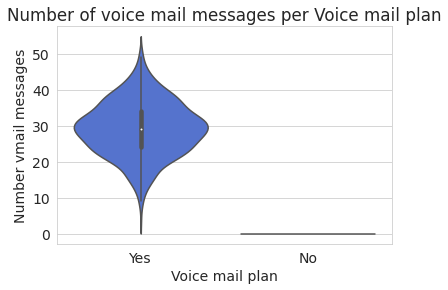

In [47]:
# Violinplot for Voice mail plan and Number of vmail messages
sns.violinplot(data= df, y= 'Number vmail messages', x= 'Voice mail plan')
plt.title("Number of voice mail messages per Voice mail plan");

* Those who don't have a voicemail plan don't send voicemails.
* Number of voicemails messages is also symettrically distributed.
* We have seen that churn rate of users is **low** if they **have vmail** plans
  * **8.68 %**   for those who **have vmail** plan 
  * **16.72 %**  for those who **dont have vmail** plan.

___
**Let's analyze the behavior of only those customers who have taken vmail plans**

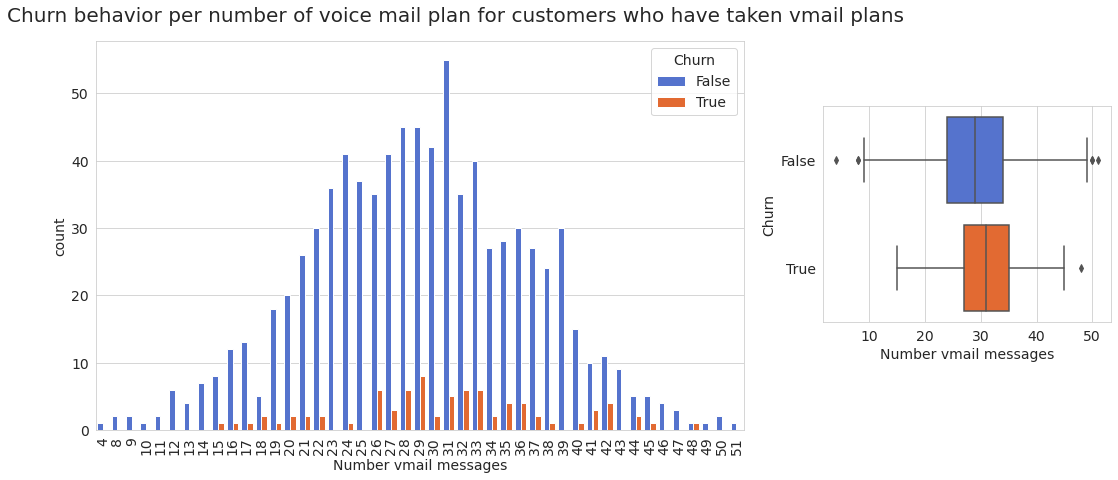

In [220]:
# Creates a blanck canvas
fig= plt.figure(figsize=(10,6))

df_with_vmail_plan = df[df['Voice mail plan'] == 'Yes']

# main axes
ax1= fig.add_axes([0, 0, 0.9, 0.9])
sns.countplot(data= df_with_vmail_plan, x= 'Number vmail messages', hue= 'Churn' , ax= ax1)
plt.legend(loc=1, title = "Churn")
plt.xticks(rotation=90);

# insert small axes 
ax2= fig.add_axes([1.01, 0.25, 0.4,0.5]);
sns.boxplot(data= df_with_vmail_plan, x= 'Number vmail messages', y= 'Churn' , ax= ax2, orient= 'h')
fig.suptitle('Churn behavior per number of voice mail plan for customers who have taken vmail plans', fontsize=20);

* **User with vmail plan**
    *  Churn rate is low if user have taken vmail plan.
    * As number of vmail increases then chances of getting churned is also increasing.
* **User without vmail plan**
  * Dont do vmail messages.

# **Conclusion:**

* **Hurray, it seems that customer are satisfied with voice mail plan but why they are churnig if they send more vmails.**

* **But vmail plan unable to satisfy all types of customers** 

##Total day minutes

**We have seen that, the Total day minutes have postive co-relation with Churn.**

**Analyze it on**
* Scatterplot
* Histogram
* Boxplot

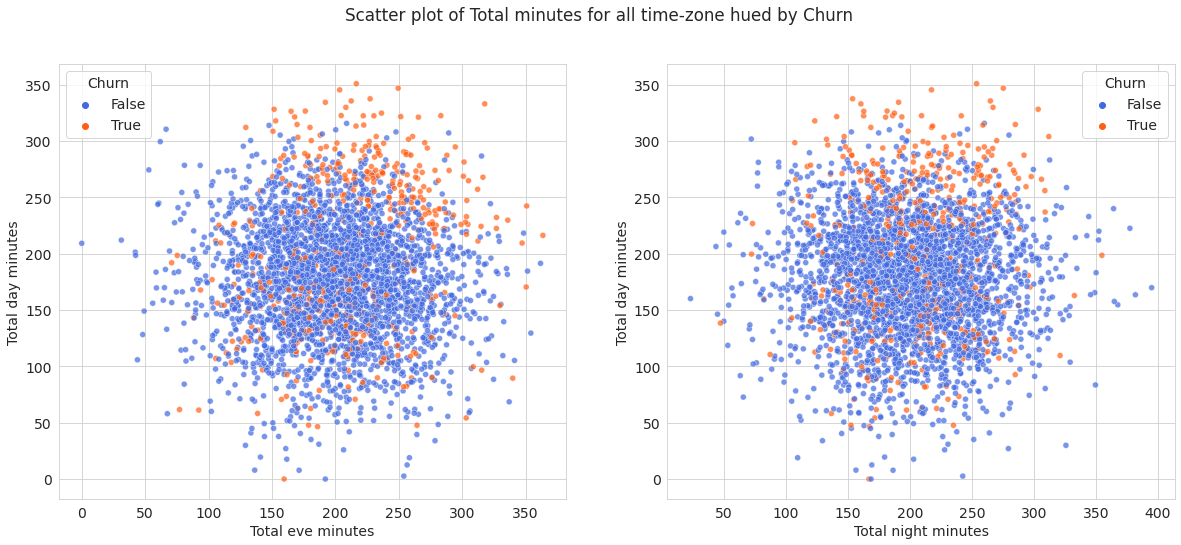

In [209]:
# Create blank figure object
fig, ax = plt.subplots(nrows= 1, ncols= 2, figsize= (20,8))

sns.scatterplot(data= df, x= 'Total eve minutes', y= 'Total day minutes', hue= 'Churn', alpha= 0.7, ax= ax[0])
sns.scatterplot(data= df, x= 'Total night minutes', y= 'Total day minutes', hue= 'Churn', alpha= 0.7, ax= ax[1])

fig.suptitle('Scatter plot of Total minutes for all time-zone hued by Churn');

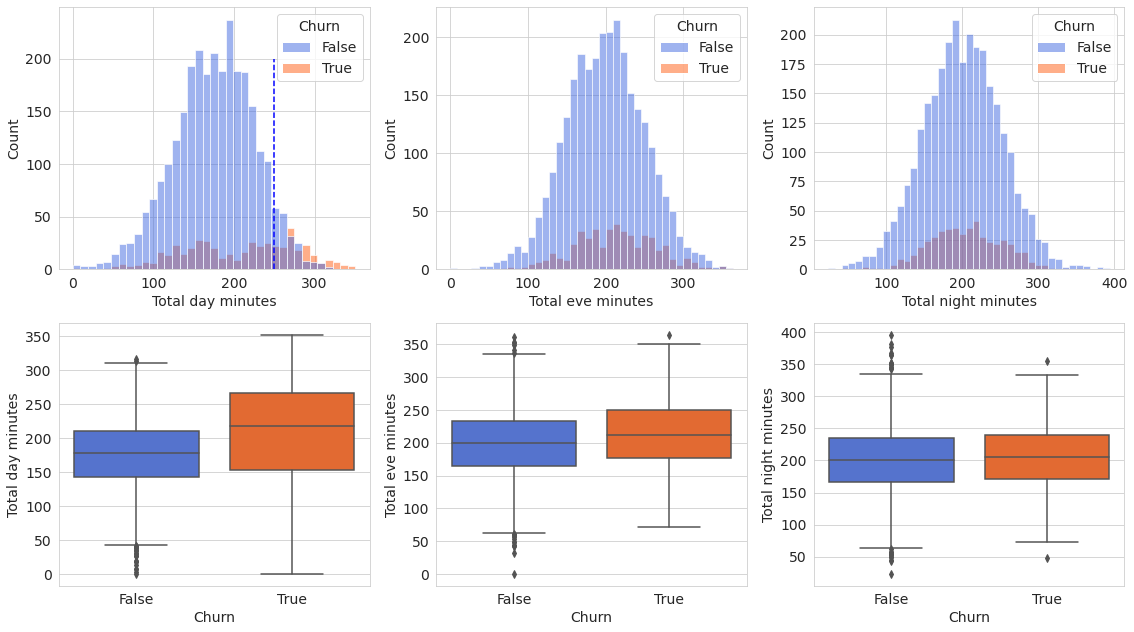

In [234]:
fig, ax = plt.subplots(nrows= 2, ncols= 3, figsize= (16,9))
lst_minutes = ['Total day minutes','Total eve minutes', 'Total night minutes']

# for 1st row (histogram)
for i,minutes in enumerate(lst_minutes):  
  sns.histplot(ax= ax[0,i], data= df, x= minutes, hue= 'Churn')

# vertical line at 250
ax[0,0].vlines(x = 250, ymin = 0, ymax = 200,colors = 'blue',ls= '--')

# for 2nd row (box-plot)
for i,minutes in enumerate(lst_minutes):  
  sns.boxplot(ax= ax[1,i], data= df, y= minutes, x= 'Churn')

plt.tight_layout();  

* **For Day Users**

   * The churn rate of the user who talks more on the phone has been seen higher.

* **For Evening and Night Users**
  * The churn behavior is the same for all users, although the in box plot median is slightly higher for chured user in evening times, but the difference is not that visible.
---

# **Conclusion**

  * We have noticed that the charges are higher during day time as compared to evening and night, this is the first reason for customer dissatisfaction.
  * Other reason could be day traffic.


# **Suggestion**
* Customers are unhappy with the **day services and plans**, company will have to offer attractive plans and tariffs for day users.


# Customer Service call

**First analyze distribution of customers per service calls.** 

In [169]:
# calculating percentage of customers per service calls
customers_pecnt_by_scalls = 100 * df.groupby("Customer service calls")['Churn'].count() / len(df)

In [170]:
customers_pecnt_by_scalls

Customer service calls
0    20.912091
1    35.433543
2    22.772277
3    12.871287
4     4.980498
5     1.980198
6     0.660066
7     0.270027
8     0.060006
9     0.060006
Name: Churn, dtype: float64

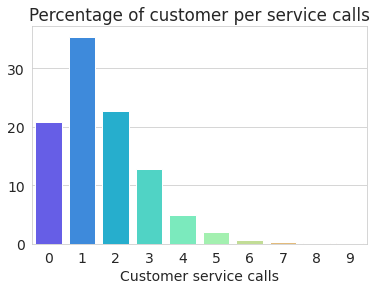

In [180]:
# bar plot for churn rate per service calls
sns.barplot(x = customers_pecnt_by_scalls.index, y= customers_pecnt_by_scalls.values, palette= 'rainbow')
plt.title("Percentage of customer per service calls");

* The number of customer service calls grater then 3 is significantly low. 

**We have seen that churning behaviour have positive corelation with customer service call, let's analysis it.** 

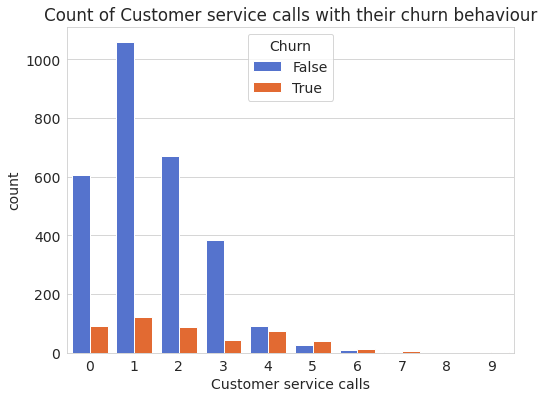

In [97]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='Customer service calls',hue='Churn')
plt.title("Count of Customer service calls with their churn behaviour");

**Let's look at closely , for customer service call grater than 3**

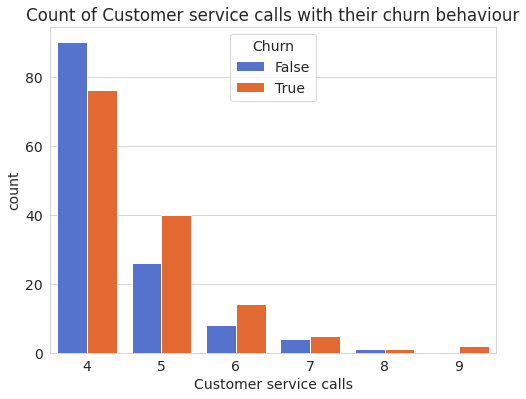

In [235]:
plt.figure(figsize=(8,6))
sns.countplot(data=df[df['Customer service calls']>3],x='Customer service calls',hue='Churn')
plt.title("Count of Customer service calls with their churn behaviour");

* Churn rate increases significantly for **4 or more calls** to the customer service. lets analyze it for more then three service calls.

* The number of customer service calls for **4 or more calls** is also significantly reduced. 


**Let's calculate churn rate per Customer service calls and then plot it.**

In [99]:
churn_rate_ser_call = df.groupby("Customer service calls")['Churn'].mean()
churn_rate_ser_call = 100 * churn_rate_ser_call
churn_rate_ser_call 

Customer service calls
0     13.199426
1     10.330229
2     11.462451
3     10.256410
4     45.783133
5     60.606061
6     63.636364
7     55.555556
8     50.000000
9    100.000000
Name: Churn, dtype: float64

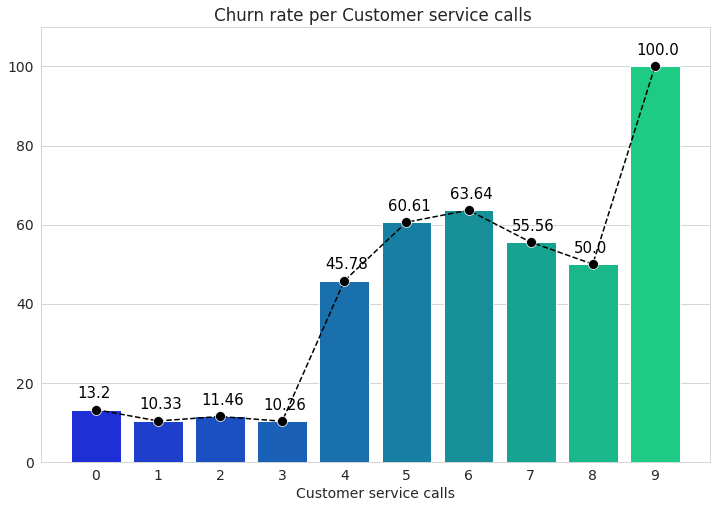

In [236]:
plt.figure(figsize=(12,8))
# bar plot for churn rate per service calls
sns.barplot(x = churn_rate_ser_call.index, y= churn_rate_ser_call.values, palette='winter')

# line plot for churn rate service calls
sns.lineplot(x = churn_rate_ser_call.index, y= churn_rate_ser_call.values,ls='--', marker='o', color='black', ms=10);

for i in range(len(churn_rate_ser_call)):
  plt.text(x= i- 0.3,y= churn_rate_ser_call.iloc[i] + 3,
           s= round(churn_rate_ser_call.iloc[i], 2), fontsize=15,
                color= 'black')


plt.title("Churn rate per Customer service calls ");
# set ylimit  
plt.ylim(0,110);


**Observation:** This shows that the churn rate is very high if customer service calls is more then 3 times. It seems taht their problum is not completly resolved.

We are creating **broader** Cohort Groups based on the **total day minutes** column values because this is feild that we are more concerned, we create a new column called **Tenure day minutes** that creates 5 separate categories:

* 0-100 minutes

* 100-160 minutes

* 160-220 minutes

* 220-250  minutes

* above 250 minutes

In [130]:
# binning method in panda data frame
df['Tenure day minutes'] = pd.cut(df['Total day minutes'], 
                             bins= [0.0,100.0, 150.0, 200.0, 250, np.inf],
                             labels= ['0-100 mins', '100-150 mins', '150-200 mins', '200-250 mins', 'over 250 mins'])

In [131]:
df.head(10)[['Total day minutes','Tenure day minutes']]

,Total day minutes,Tenure day minutes
0,265.1,over 250 mins
1,161.6,150-200 mins
2,243.4,200-250 mins
3,299.4,over 250 mins
4,166.7,150-200 mins
5,223.4,200-250 mins
6,218.2,200-250 mins
7,157.0,150-200 mins
8,184.5,150-200 mins
9,258.6,over 250 mins


**Creating a grid of Count Plots showing counts per Service calls, separated out by Tenure day minutes and colored by the Churn hue.**

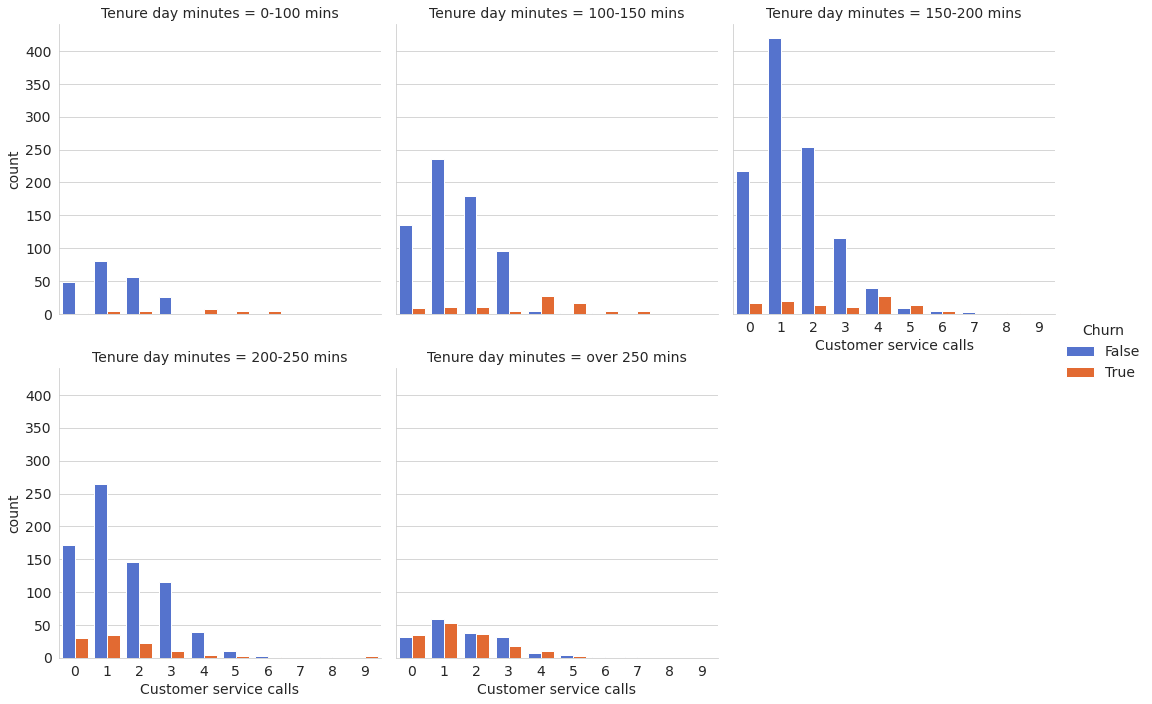

In [244]:
sns.catplot(data=df,col='Tenure day minutes',hue='Churn',x='Customer service calls',kind='count',col_wrap= 3);

**Doing same analysis by creating two different data frame.** 

In [163]:
df_less_4 =  df[~(df['Customer service calls'] > 3)]    # data frame for ('Customer service calls')  <= 3
df_4_or_more = df[(df['Customer service calls'] > 3)]  # data frame for ('Customer service calls')  > 3

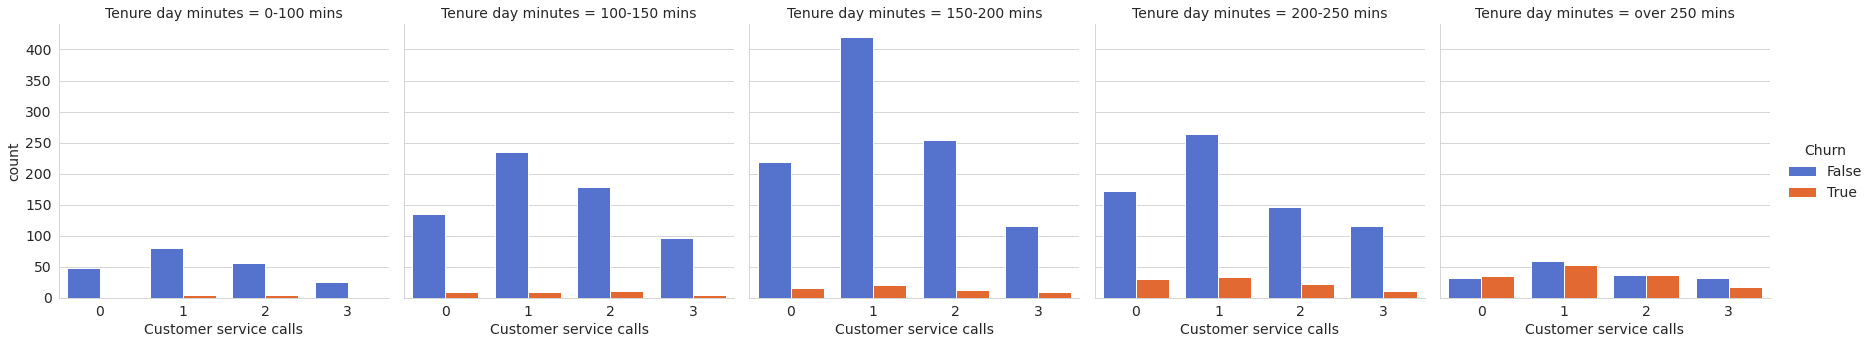

In [241]:
# for less then 4 service calls
sns.catplot(data= df_less_4,col='Tenure day minutes',hue='Churn',x='Customer service calls',kind='count');

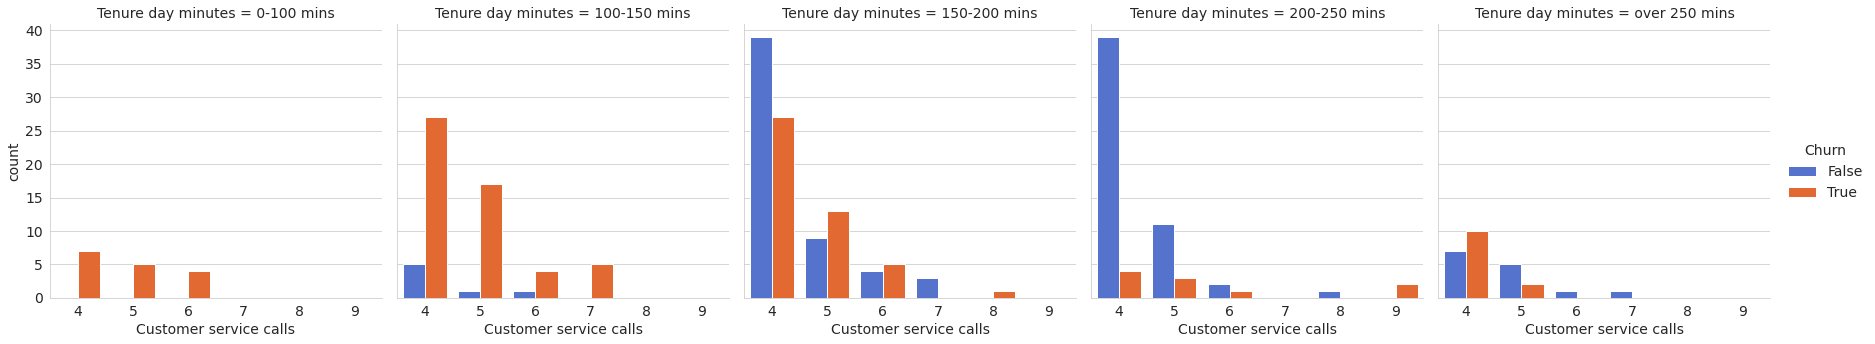

In [240]:
# for more then 3 service calls
sns.catplot(data= df_4_or_more,col='Tenure day minutes',hue='Churn',x='Customer service calls',kind='count');

* Customers who talk less in a day do not churn so easily until their problem is solved, they are trying to solve their problems by talking to the service center as much as possible, even after that if their problems are not resolved then they churn.

* Customers who talk more during the day have higher churn rate even in low service calls, means they are not happy high call rate in day.


# Data preprocessing for Churning rate with various states by choromap 
**Creating new dataframe for passing in choromap**

In [63]:
# number of retained customer per state
no_churn_by_state = df.groupby(['Churn', "State"])['Account length'].count()[False]

# number of churned customer per state
yes_churn_by_state = df.groupby(['Churn', "State"])['Account length'].count()[True]

# churn rate per state
churn_rate_by_state = 100 * yes_churn_by_state / (yes_churn_by_state + no_churn_by_state)

# create integer index 
churn_rate_by_state = churn_rate_by_state.reset_index()

# remane column
churn_rate_by_state.rename(columns = {'Account length':'Churn rate'}, inplace = True) 

# rounding off the churn rate column by 2 digits
churn_rate_by_state['Churn rate'] = churn_rate_by_state['Churn rate'].apply( lambda x: round(x, 2))

churn_rate_by_state.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL
Churn rate,5.77,10.0,20.0,6.25,26.47,13.64,16.22,9.26,14.75,12.7,14.81,5.66,6.82,12.33,8.62


In [64]:
churn_rate_by_state['Not Churned'] = no_churn_by_state.values
churn_rate_by_state['Churned'] = yes_churn_by_state.values

In [65]:
churn_rate_by_state.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL
Churn rate,5.77,10.0,20.0,6.25,26.47,13.64,16.22,9.26,14.75,12.7,14.81,5.66,6.82,12.33,8.62
Not Churned,49,72,44,60,25,57,62,49,52,55,46,50,41,64,53
Churned,3,8,11,4,9,9,12,5,9,8,8,3,3,9,5


In [247]:
# key is code and value is full name of that state 
states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}

In [250]:
 # craeting data frame
state_name_info = pd.DataFrame({'State':list(states.keys()), 'State name': list(states.values())})
state_name_info.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL
State name,Alaska,Alabama,Arkansas,Arizona,California,Colorado,Connecticut,District of Columbia,Delaware,Florida,Georgia,Hawaii,Iowa,Idaho,Illinois


In [251]:
# merging two datframe on state column by inner join
df_state_final = pd.merge(state_name_info, churn_rate_by_state, how= 'inner', on= 'State') 

In [252]:
df_state_final.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL
State name,Alaska,Alabama,Arkansas,Arizona,California,Colorado,Connecticut,District of Columbia,Delaware,Florida,Georgia,Hawaii,Iowa,Idaho,Illinois
Churn rate,5.77,10.0,20.0,6.25,26.47,13.64,16.22,9.26,14.75,12.7,14.81,5.66,6.82,12.33,8.62
Not Churned,49,72,44,60,25,57,62,49,52,55,46,50,41,64,53
Churned,3,8,11,4,9,9,12,5,9,8,8,3,3,9,5


In [263]:
def creat_text(df, lst_merge):
  """function that return the material that I passed in choromap"""
  # empty list
  list_text = []
  # length of list that passed 
  length= len(lst_merge)
  len_df = len(df)

  for i in range(len_df):
    text = ''
    
    for j in range(length):
      if j == 0:
        text =  text + df[lst_merge[j]].iloc[i] + '<br>'   # The <br> tag inserts a single line break
      elif j == (length - 1):
        text =  text + lst_merge[j] + ' : '  + str(df[lst_merge[j]].loc[i])   # at end of sentence we dont need <br>
      else:
        text =  text + lst_merge[j] + ' : '  + str(df[lst_merge[j]].loc[i]) + '<br>' 
    # append the text 
    list_text.append(text)

  return list_text

# checking the function
# creat_text(df_state_final, ['State name', 'Churned', 'Not Churned'])

# for simple version
# def creat_text2(df, name, ch, nch):
#   list_text = []
#   for i in range(len(df)):
#     string= df[name].loc[i] + '<br>' + 'Churned : '  + str(df[ch].loc[i]) + "<br>" + "Not Churned: " + str(df[nch].loc[i])
#     list_text.append(string)

#   return list_text

# checking the function
# creat_text2(df_state_final, 'State name', 'Churned', 'Not Churned')

In [268]:
# addind text column 
df_state_final['text'] = creat_text(df_state_final, ['State name', 'Churned', 'Not Churned'])

# Churning rate with various states by choromap

In [269]:
# defining function for choromap
def usa_plot(data_frame, locations, z, text, title_col_bar, title, colorscale):
  """geographical ploting for usa"""
  data = dict(type='choropleth',
              colorscale = colorscale,
              reversescale = True,
              locations = data_frame[locations],
              z = data_frame[z],
              locationmode = 'USA-states',
              text = data_frame[text],
              marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
              colorbar = {'title': title_col_bar}
              ) 

  layout = dict(title = title,
                geo = dict(scope='usa',
                          showlakes = True,
                          lakecolor = 'rgb(85,173,240)')
              )

  choromap = go.Figure(data = [data],layout = layout)
  iplot(choromap)


# Choromap plot for Churning rate with various states
usa_plot(data_frame= df_state_final, locations= 'State', z= 'Churn rate',
         text= ['text'], title_col_bar= "Churn Rate", title= 'Churn Rate By State', colorscale= 'viridis')

# Curse of dimensionality 
Curse of Dimensionality refers to a set of problems that arise when working with high-dimensional data. The dimension of a dataset corresponds to the number of attributes/features that exist in a dataset. A dataset with a large number of attributes.

Some of the difficulties that come with high dimensional data manifest during analyzing or visualizing the data to identify patterns, and some manifest while training machine learning models.

# Dimensionality Reduction

**For analysing the data I am reducing it to 2 dimension.**

In [271]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE

In [ ]:
df_final.columns

In [273]:
df_final = df_final.drop(['State', 'Churn'], axis= 1)

In [274]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   Number vmail messages   3333 non-null   int64  
 2   Total day minutes       3333 non-null   float64
 3   Total day calls         3333 non-null   int64  
 4   Total day charge        3333 non-null   float64
 5   Total eve minutes       3333 non-null   float64
 6   Total eve calls         3333 non-null   int64  
 7   Total eve charge        3333 non-null   float64
 8   Total night minutes     3333 non-null   float64
 9   Total night calls       3333 non-null   int64  
 10  Total night charge      3333 non-null   float64
 11  Total intl minutes      3333 non-null   float64
 12  Total intl calls        3333 non-null   int64  
 13  Total intl charge       3333 non-null   float64
 14  Customer service calls  3333 non-null   

In [276]:
# scaling our parameter
scaler = StandardScaler()  # creating StandardScaler object
scaled_X = scaler.fit_transform(df_final)  # scaling our data using fit transform

# KernelPCA and TSNE

In [277]:
# Choosing rbf kernel
kpca = KernelPCA(n_components=2, kernel= 'rbf')
principal_components = kpca.fit_transform(scaled_X)

# t- SNE
tsne = TSNE(n_components=2)
tsne_repr = tsne.fit_transform(scaled_X)

# Ploting 

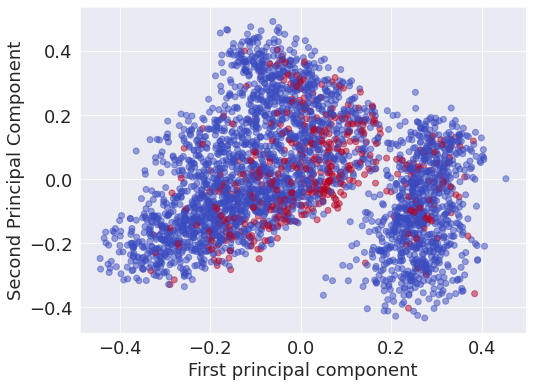

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(principal_components[:,0],principal_components[:,1], c= df['Churn'], alpha = 0.4, palette= ['#4169E1', '#FF5F15'])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component');

plt.figure(figsize=(8,6))
plt.scatter(tsne_repr[:,0],tsne_repr[:,1], c= df['Churn'], alpha = 0.4, cmap= 'coolwarm')
plt.xlabel('First  component')
plt.ylabel('Second Component');

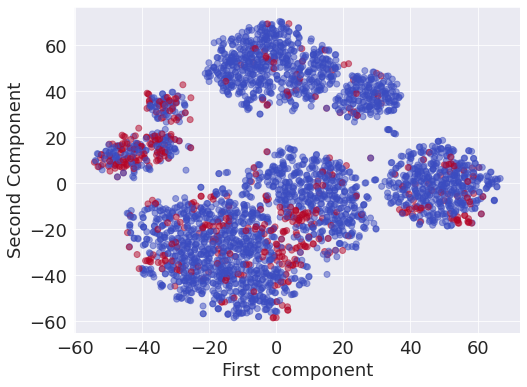